In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, 
#directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
%matplotlib inline
import seaborn as sns
from scipy.stats import kurtosis

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from mlxtend.frequent_patterns import apriori, association_rules 

import tensorflow as tf

import pandas as pd
from collections import defaultdict


**Converting data to Binary Data:**

In [ ]:
data=pd.read_csv('d.csv')
data

,Age,Gender,Weight,friends/Relatives,understanding parents,injury,fights,bullied,toxic relationship,stressed,missed classes,smoke,Alcohol,got drunk,drugs,Have you ever thought of attempting suicide?,bad experience
0,23,Male,More than 70,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,Yes,NO,No
1,31,Male,50 - 60,No,No,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No
2,22,Male,60 - 70,Yes,Yes,No,No,No,No,No,No,No,No,No,No,NO,No
3,42,Female,60 - 70,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,No,NO,No
4,43,Male,60 - 70,No,No,No,Yes,Yes,No,No,No,No,No,No,No,NO,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,30,Female,50 - 60,Yes,Yes,No,No,Yes,No,Yes,No,No,No,Yes,No,NO,No
2075,30,Female,50 - 60,Yes,Yes,No,No,Yes,No,Yes,No,No,No,Yes,No,NO,No
2076,24,Female,60 - 70,Yes,No,No,Yes,No,Yes,No,No,No,No,No,No,NO,No
2077,31,Male,50 - 60,No,No,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No


In [ ]:
data.isna().sum()

Age                                             0
Gender                                          0
Weight                                          0
friends/Relatives                               0
understanding parents                           0
injury                                          0
fights                                          0
bullied                                         0
toxic relationship                              0
stressed                                        0
missed classes                                  0
smoke                                           0
Alcohol                                         0
got drunk                                       0
drugs                                           0
Have you ever thought of attempting suicide?    0
bad experience                                  0
dtype: int64

In [ ]:
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': 2,
 'Weight': 4,
 'friends/Relatives': 2,
 'understanding parents': 2,
 'injury': 2,
 'fights': 2,
 'bullied': 2,
 'toxic relationship': 2,
 'stressed': 2,
 'missed classes': 2,
 'smoke': 2,
 'Alcohol': 2,
 'got drunk': 2,
 'drugs': 2,
 'Have you ever thought of attempting suicide?': 2,
 'bad experience': 11}

In [ ]:
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': ['Male', 'Female'],
 'Weight': ['More than 70', '50 - 60', '60 - 70', '50-60'],
 'friends/Relatives': ['Yes', 'No'],
 'understanding parents': ['Yes', 'No'],
 'injury': ['No', 'Yes'],
 'fights': ['Yes', 'No'],
 'bullied': ['No', 'Yes'],
 'toxic relationship': ['No', 'Yes'],
 'stressed': ['Yes', 'No'],
 'missed classes': ['Yes', 'No'],
 'smoke': ['No', 'Yes'],
 'Alcohol': ['No', 'Yes'],
 'got drunk': ['No', 'Yes'],
 'drugs': ['Yes', 'No'],
 'Have you ever thought of attempting suicide?': ['NO', 'Yes'],
 'bad experience': ['No',
  'Many more ',
  'Relationship issue',
  'Many more',
  'Got bullied for 2 years in school',
  'I hate dogs',
  'During 12 boards exam time. "Breakup"',
  'When my mother was dead ',
  "My mother's death ",
  'NO',
  'Corona virus ']}

In [ ]:
def encode_gender(x):
    if x.lower()[0] == 'f':
        return 0
    elif x.lower()[0] == 'm':
        return 1
    else:
        return 2

In [ ]:
data['Gender'] = data['Gender'].apply(encode_gender)


In [ ]:
data

,Age,Gender,Weight,friends/Relatives,understanding parents,injury,fights,bullied,toxic relationship,stressed,missed classes,smoke,Alcohol,got drunk,drugs,Have you ever thought of attempting suicide?,bad experience
0,23,1,More than 70,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,Yes,NO,No
1,31,1,50 - 60,No,No,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No
2,22,1,60 - 70,Yes,Yes,No,No,No,No,No,No,No,No,No,No,NO,No
3,42,0,60 - 70,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,No,NO,No
4,43,1,60 - 70,No,No,No,Yes,Yes,No,No,No,No,No,No,No,NO,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,30,0,50 - 60,Yes,Yes,No,No,Yes,No,Yes,No,No,No,Yes,No,NO,No
2075,30,0,50 - 60,Yes,Yes,No,No,Yes,No,Yes,No,No,No,Yes,No,NO,No
2076,24,0,60 - 70,Yes,No,No,Yes,No,Yes,No,No,No,No,No,No,NO,No
2077,31,1,50 - 60,No,No,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No


In [ ]:
target='Have you ever thought of attempting suicide?'


binary_features = [
    'friends/Relatives',
    'understanding parents',
    'injury',
    'fights',
    'bullied',
    'toxic relationship',
    'stressed',
    'missed classes',
    'smoke',
    'Alcohol',
    'got drunk',
    'drugs',
    'bad experience'

]

ordinal_features = [
    'Weight'
]

In [ ]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x))
    return df


In [ ]:
binary_positive_values = ['Yes' for feature in binary_features]

ordinal_orderings = [
    ['More than 70', '50 - 60', '60 - 70', '50-60']
]

In [ ]:
data = binary_encode(
    data,
    columns=binary_features,
    positive_values=binary_positive_values
)
data = ordinal_encode(
    data,
    columns=ordinal_features,
    orderings=ordinal_orderings
)


In [ ]:
data

,Age,Gender,Weight,friends/Relatives,understanding parents,injury,fights,bullied,toxic relationship,stressed,missed classes,smoke,Alcohol,got drunk,drugs,Have you ever thought of attempting suicide?,bad experience
0,23,1,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0
1,31,1,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0
2,22,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,42,0,2,1,1,0,0,1,1,0,1,1,1,0,0,0,0
4,43,1,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,30,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0
2075,30,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0
2076,24,0,2,1,0,0,1,0,1,0,0,0,0,0,0,0,0
2077,31,1,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0


In [ ]:
data = binary_encode(data, columns=['Have you ever thought of attempting suicide?'], positive_values=['Yes'])

In [ ]:
y = data['Have you ever thought of attempting suicide?'].copy()
X = data.drop('Have you ever thought of attempting suicide?', axis=1).copy()

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [ ]:
X.shape

(2079, 16)

In [ ]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean() * 100, (1 - y_train.mean()) * 100))

Class Distribution (Positive to Negative): 45.9% / 54.1%


In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(X)

PCA(n_components=2)

In [ ]:
x_pca=pca.transform(X)

In [ ]:
X.shape

(2079, 16)

In [ ]:
x_pca.shape

(2079, 2)

In [ ]:
X

array([[-0.67244943,  0.79168211, -1.5784834 , ..., -0.81764254,
         1.53402275,  0.        ],
       [ 0.02560193,  0.79168211, -0.18735708, ...,  1.22302834,
        -0.65188081,  0.        ],
       [-0.75970585,  0.79168211,  1.20376924, ..., -0.81764254,
        -0.65188081,  0.        ],
       ...,
       [-0.58519301, -1.26313325,  1.20376924, ..., -0.81764254,
        -0.65188081,  0.        ],
       [ 0.02560193,  0.79168211, -0.18735708, ...,  1.22302834,
        -0.65188081,  0.        ],
       [ 0.72365329,  0.79168211, -0.18735708, ..., -0.81764254,
         1.53402275,  0.        ]])

In [ ]:
x_pca

array([[-0.71908149, -0.46910104],
       [ 2.10960713, -0.00949933],
       [-1.09062156, -0.96950509],
       ...,
       [-0.69392733, -0.03227078],
       [ 2.10960713, -0.00949933],
       [-0.01334372, -2.26334808]])

In [ ]:
pca.explained_variance_ratio_

array([0.22668447, 0.1461358 ])

In [ ]:
pca.n_components_

2

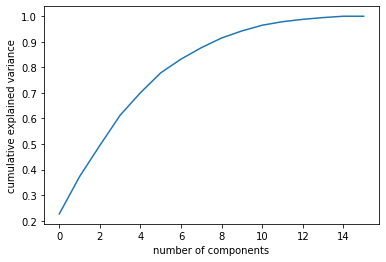

In [ ]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
X_train_pca, X_test_pca, y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=30)

**DIkSHA**

In [ ]:
df_orig = pd.read_csv('/content/sample_data/data.csv')
df = df_orig.copy()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    2079 non-null   int64 
 1   Gender                 2079 non-null   int64 
 2   Weight                 2079 non-null   int64 
 3   friends/Relatives      2079 non-null   int64 
 4   understanding parents  2079 non-null   int64 
 5   injury                 2079 non-null   int64 
 6   fights                 2079 non-null   int64 
 7   bullied                2079 non-null   int64 
 8   toxic relationship     2079 non-null   int64 
 9   stressed               2079 non-null   int64 
 10  missed classes         2079 non-null   int64 
 11  smoke                  2079 non-null   int64 
 12  Alcohol                2079 non-null   int64 
 13  got drunk              2079 non-null   int64 
 14  drugs                  2079 non-null   int64 
 15  attempted_suicide    

In [ ]:
df.shape


(2079, 17)

In [ ]:
df.head()

,Age,Gender,Weight,friends/Relatives,understanding parents,injury,fights,bullied,toxic relationship,stressed,missed classes,smoke,Alcohol,got drunk,drugs,attempted_suicide,bad experience
0,23,8,3,1,1,0,1,0,0,1,1,0,0,0,1,0,0
1,31,8,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0
2,22,8,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,42,9,2,1,1,0,0,1,1,0,1,1,1,0,0,0,0
4,43,8,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.describe()

,Age,Gender,Weight,friends/Relatives,understanding parents,injury,fights,bullied,toxic relationship,stressed,missed classes,smoke,Alcohol,got drunk,drugs,attempted_suicide
count,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.00000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000
mean,30.706590,8.385281,1.732564,0.551708,0.555075,0.419432,0.507456,0.479076,0.493987,0.342953,0.47138,0.341029,0.308802,0.400673,0.298220,0.455026
std,11.463232,0.486779,0.771642,0.497439,0.497077,0.493585,0.500065,0.499682,0.500084,0.474810,0.49930,0.474169,0.462111,0.490153,0.457587,0.498093
min,9.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.500000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,8.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,9.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,99.000000,9.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [ ]:
df.isnull().sum()

Age                      0
Gender                   0
Weight                   0
friends/Relatives        0
understanding parents    0
injury                   0
fights                   0
bullied                  0
toxic relationship       0
stressed                 0
missed classes           0
smoke                    0
Alcohol                  0
got drunk                0
drugs                    0
attempted_suicide        0
bad experience           0
dtype: int64

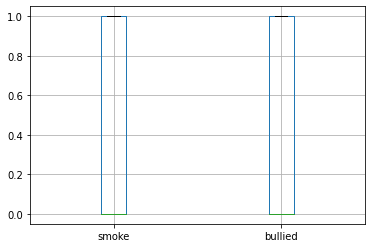

In [ ]:
bp = df.boxplot(column=['smoke', 'bullied'])


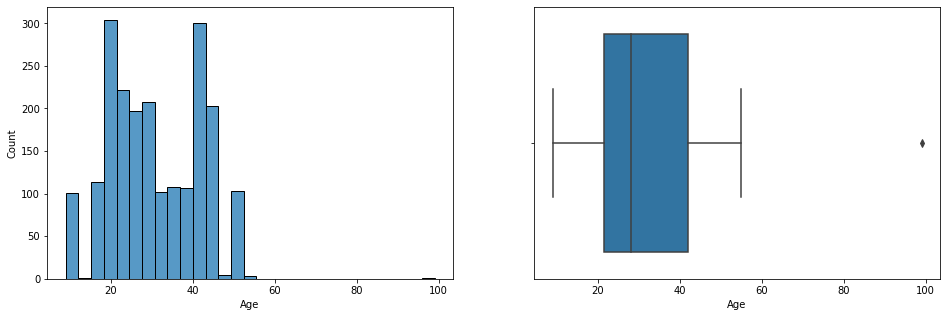

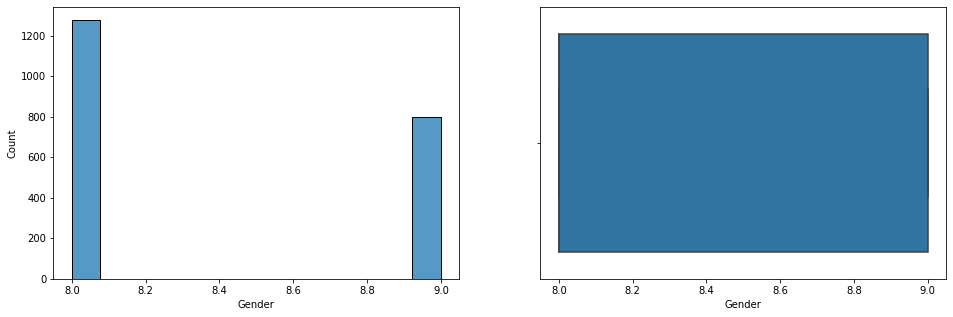

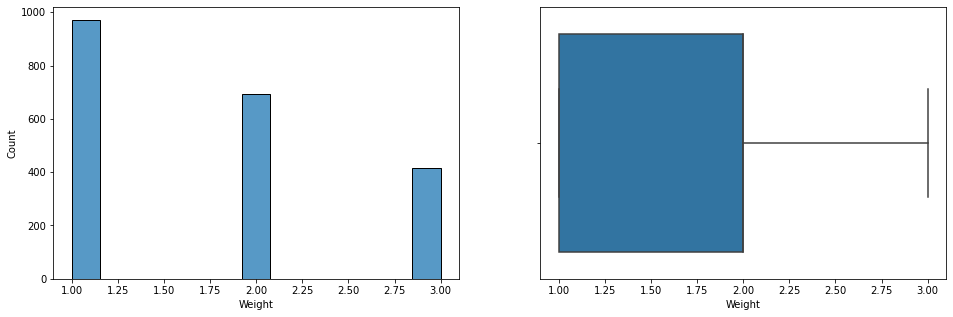

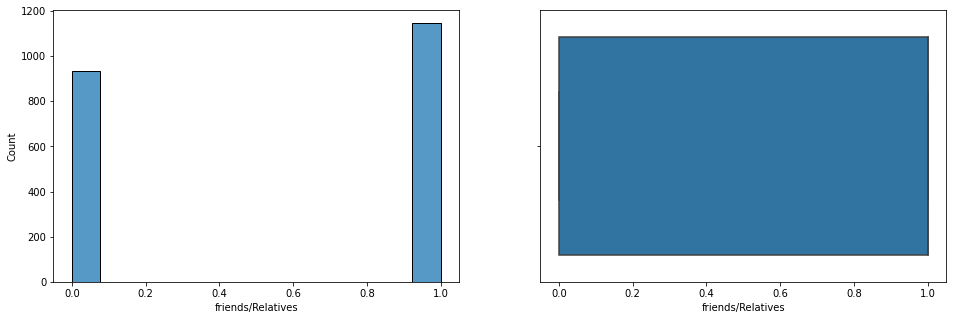

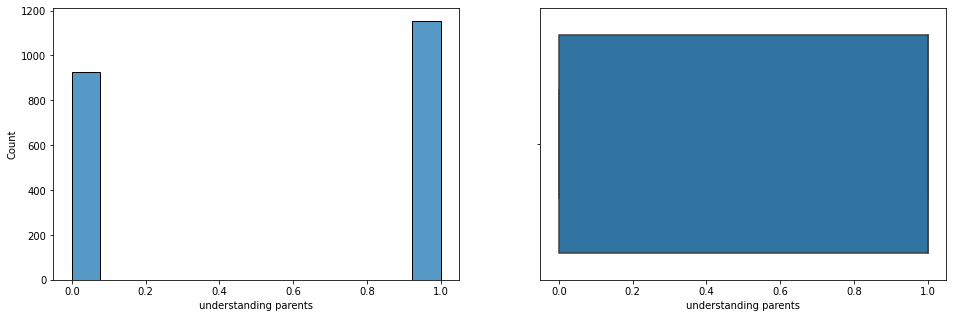

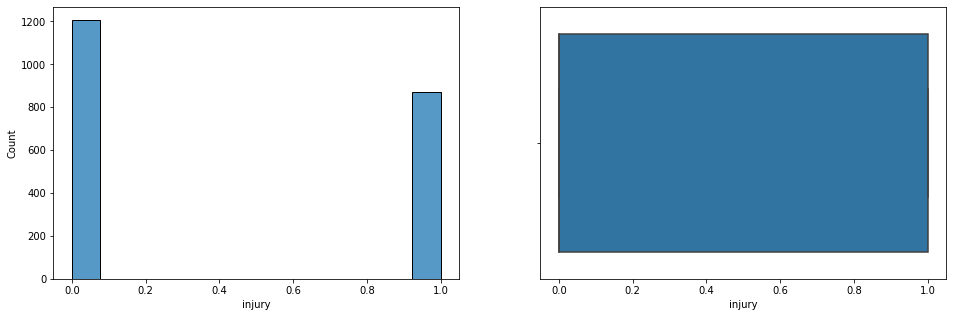

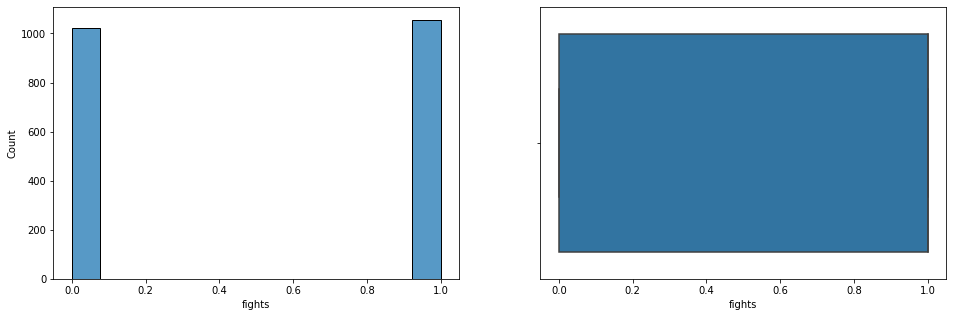

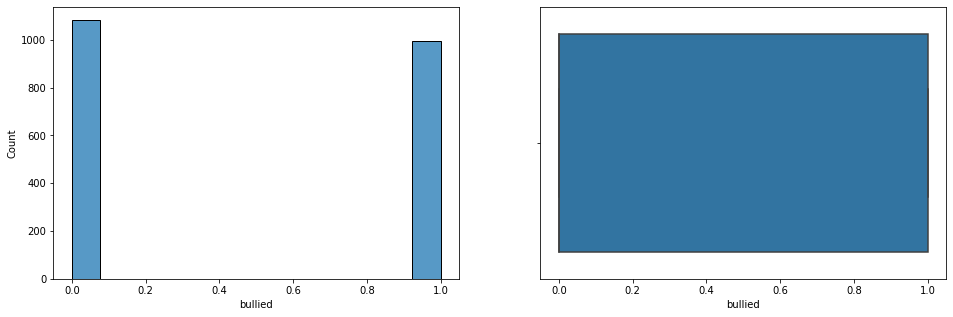

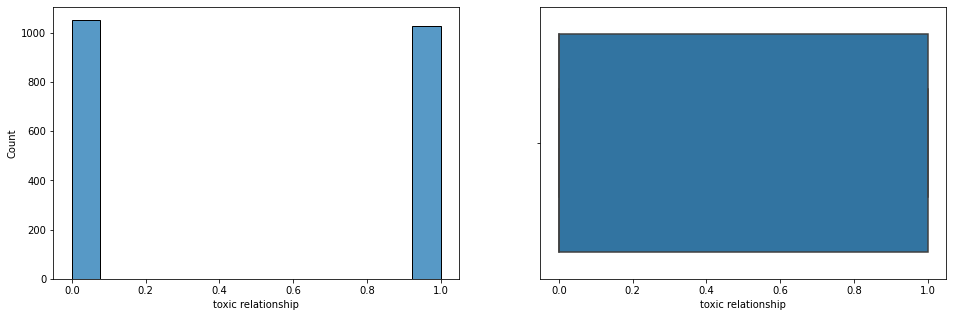

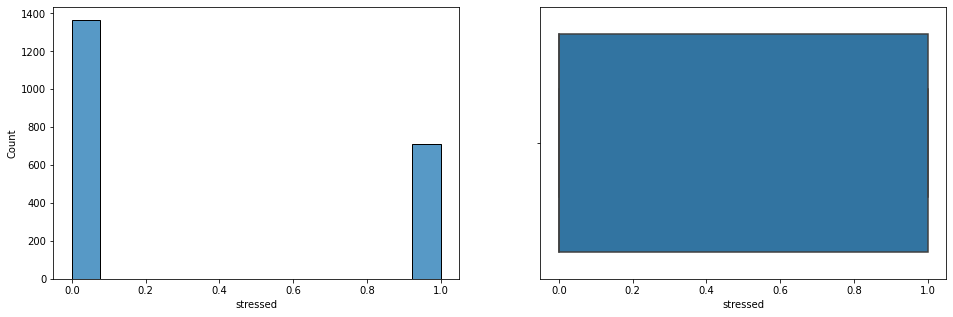

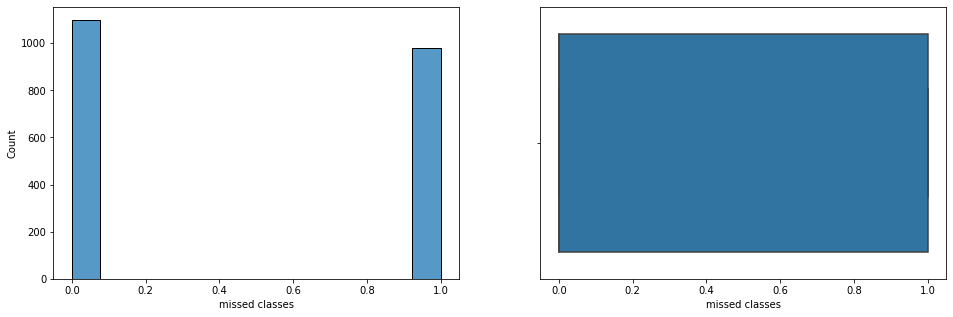

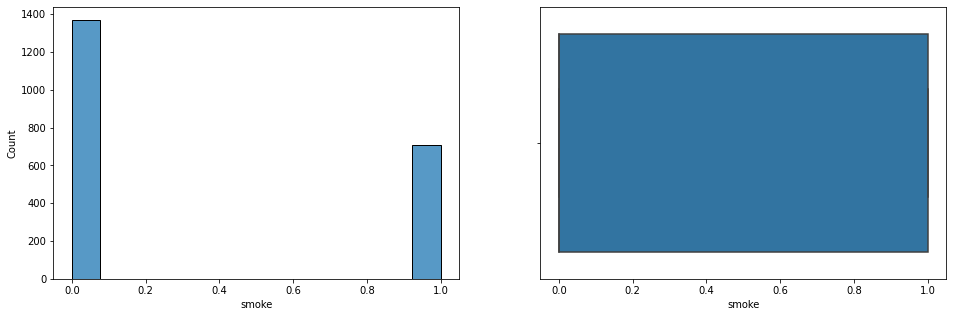

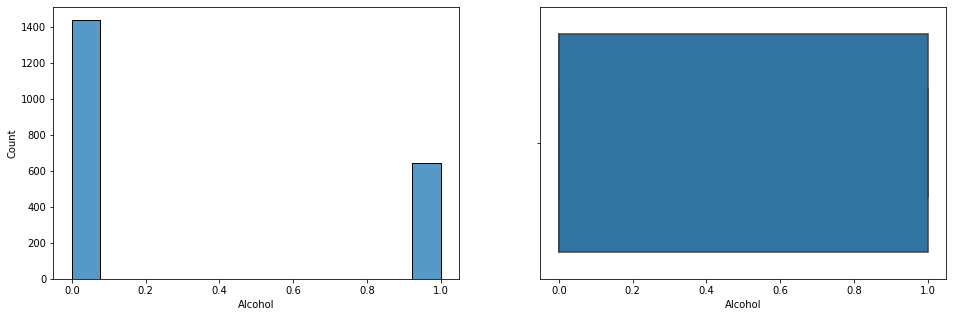

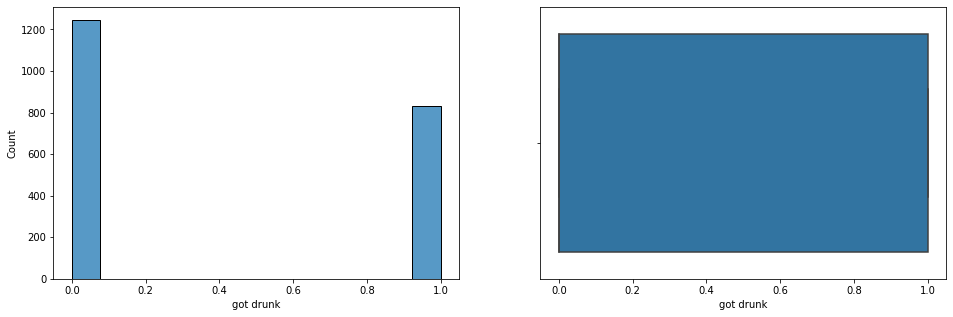

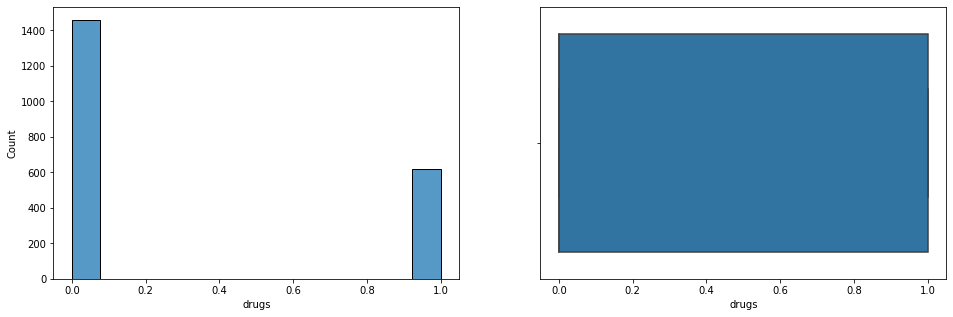

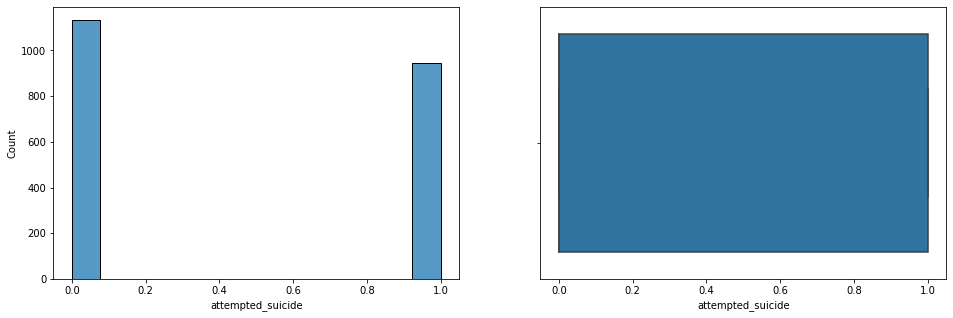

In [ ]:
df_num = df.select_dtypes(exclude=object)
for col in df_num.columns:
  fig, ax = plt.subplots(1, 2, figsize=(16,5))
  sns.histplot(data=df_num, x=col, ax=ax[0])
  sns.boxplot(data=df_num, x=col, ax=ax[1])

In [ ]:
for col in df_num.columns:
  sk = df_num[col].skew(axis = 0, skipna = True)
  if (sk > 0.5) or (sk< -0.5):
    print(col," with ",sk," is positively skewed! ")
  else:
    print(col, " with ", sk, " is normal!")

Age  with  0.24645159585669962  is normal!
Gender  with  0.47179161042153306  is normal!
Weight  with  0.4995265079160655  is normal!
friends/Relatives  with  -0.20809532065050318  is normal!
understanding parents  with  -0.22180699151509017  is normal!
injury  with  0.3267732136941852  is normal!
fights  with  -0.029846884531720307  is normal!
bullied  with  0.08382795562722832  is normal!
toxic relationship  with  0.024069132444371394  is normal!
stressed  with  0.6621503095522571  is positively skewed! 
missed classes  with  0.11474891745376366  is normal!
smoke  with  0.6711685193682653  is positively skewed! 
Alcohol  with  0.8282944479487532  is positively skewed! 
got drunk  with  0.40567855398938774  is normal!
drugs  with  0.8827789928483063  is positively skewed! 
attempted_suicide  with  0.18075678288676555  is normal!


In [ ]:
for col in df_num.columns:
  kt = kurtosis(df_num[col], axis=0, bias=True)
  if kt > 3:
    print(col," with ",kt," is Leptokurtic! Higher chance of outliers!")
  elif kt < 3:
    print(col," with ",kt," is Platykurtic! Medium chance of outliers!")
  else:
    print(col," with ",kt," is Mesokurtic! No chance of outliers!")

Age  with  -0.5209348660110953  is Platykurtic! Medium chance of outliers!
Gender  with  -1.7777338186421876  is Platykurtic! Medium chance of outliers!
Weight  with  -1.1611350935146403  is Platykurtic! Medium chance of outliers!
friends/Relatives  with  -1.9567588147471848  is Platykurtic! Medium chance of outliers!
understanding parents  with  -1.9508726404047025  is Platykurtic! Medium chance of outliers!
injury  with  -1.8933733268472144  is Platykurtic! Medium chance of outliers!
fights  with  -1.999110448755924  is Platykurtic! Medium chance of outliers!
bullied  with  -1.992983012381938  is Platykurtic! Medium chance of outliers!
toxic relationship  with  -1.9994215126933996  is Platykurtic! Medium chance of outliers!
stressed  with  -1.562189540000698  is Platykurtic! Medium chance of outliers!
missed classes  with  -1.9868516833484993  is Platykurtic! Medium chance of outliers!
smoke  with  -1.550182739130882  is Platykurtic! Medium chance of outliers!
Alcohol  with  -1.31491

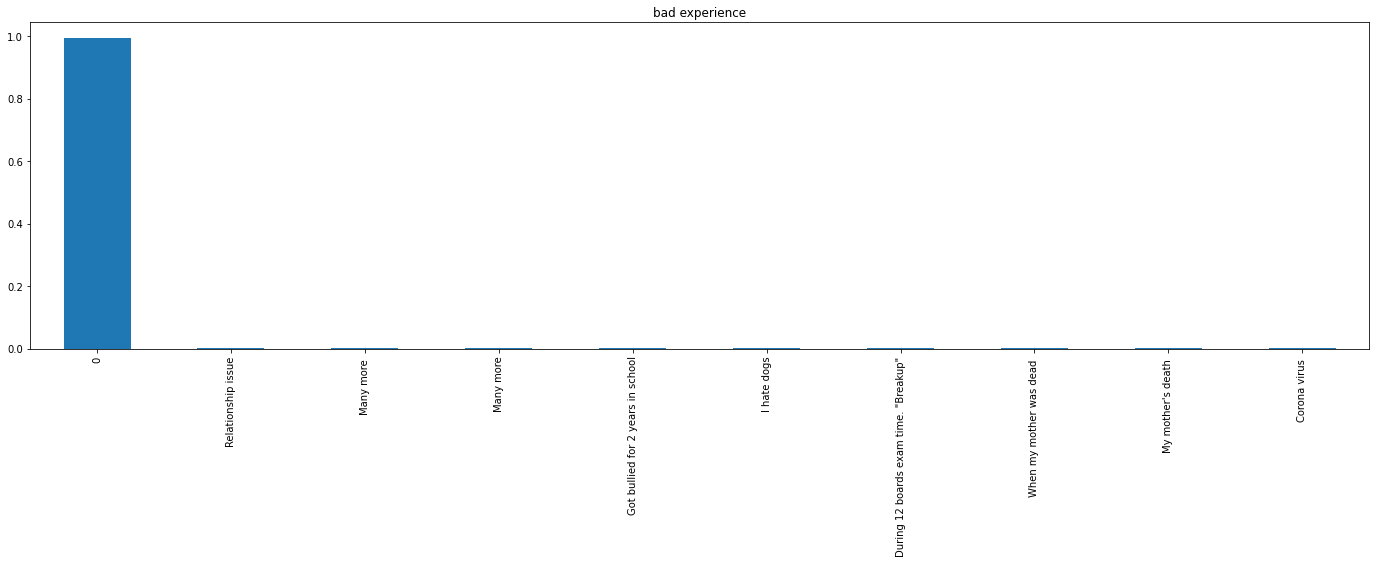

In [ ]:
df_cat = df.select_dtypes(include=object)
for col in df_cat.columns:
  fig, ax = plt.subplots(1, 1, figsize=(16,5))
  df_cat[col].value_counts(normalize=True).plot.bar(figsize = (24,6), title=col)

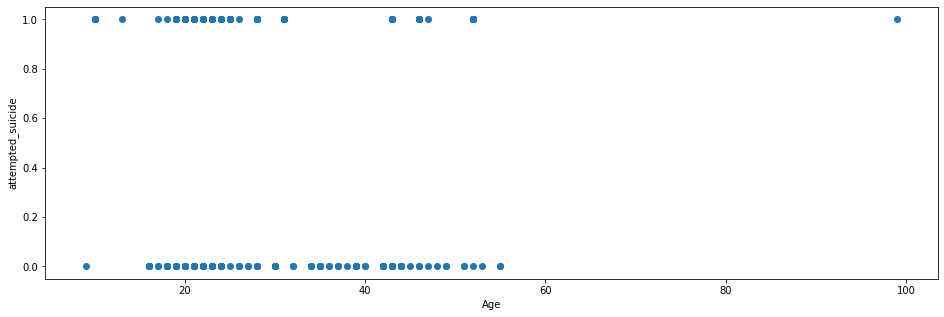

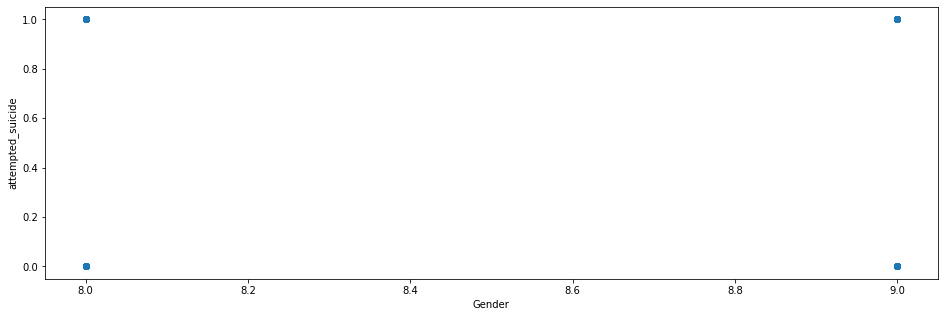

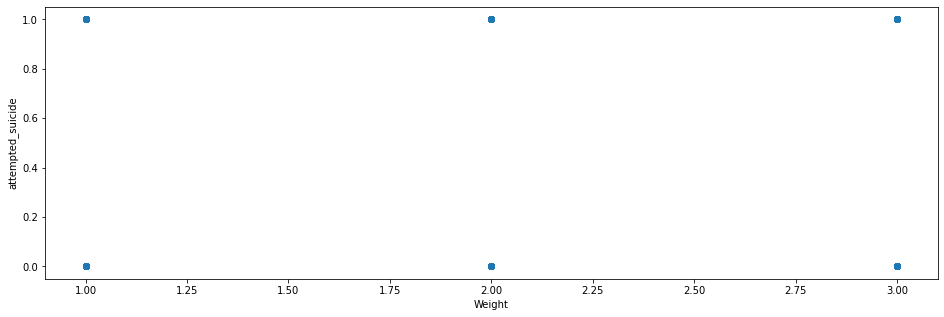

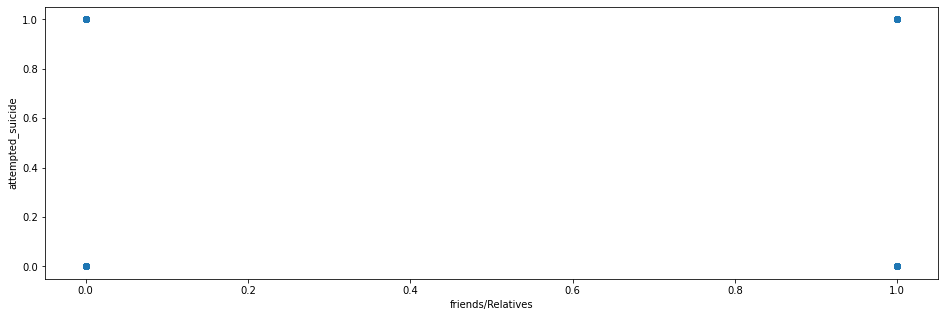

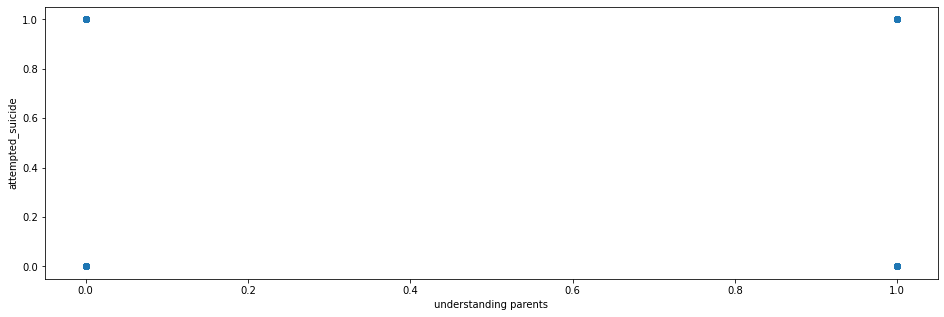

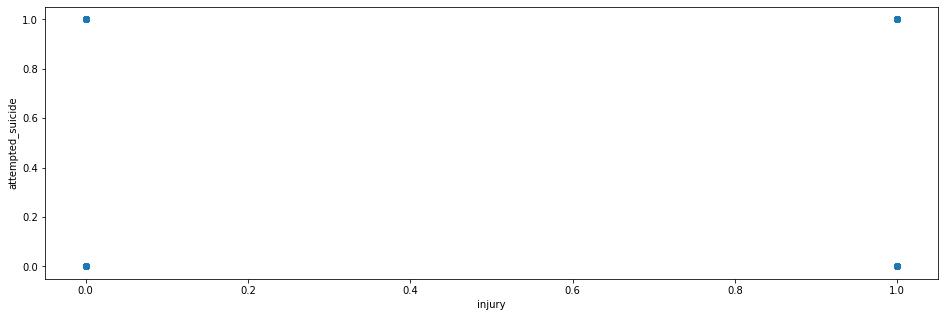

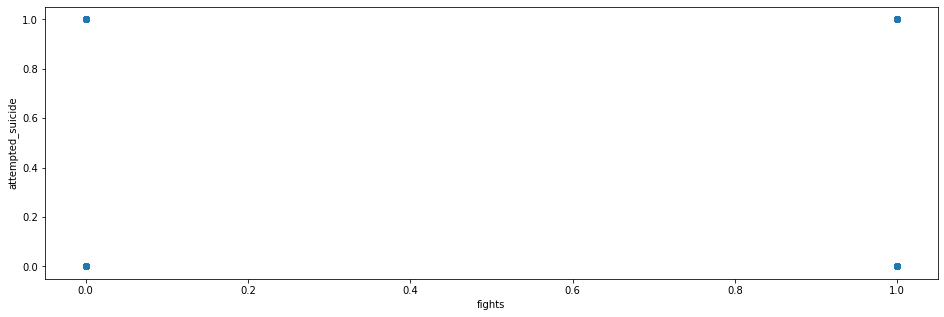

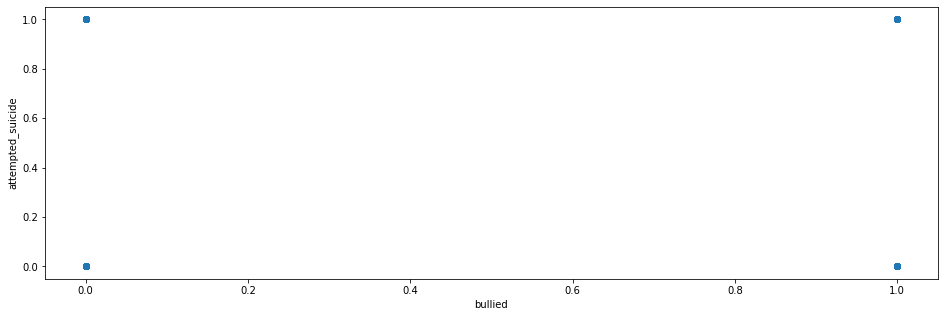

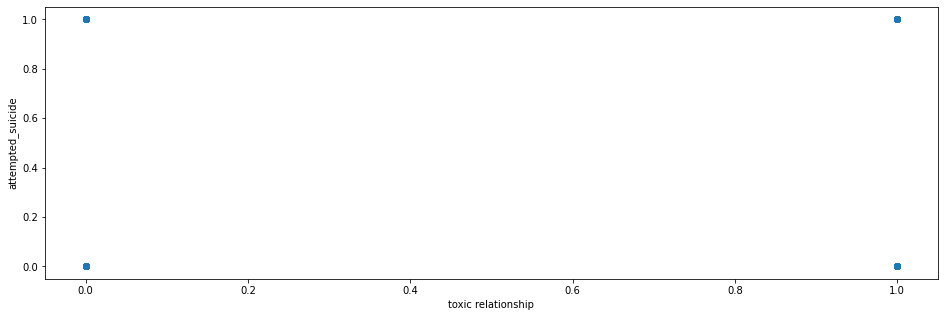

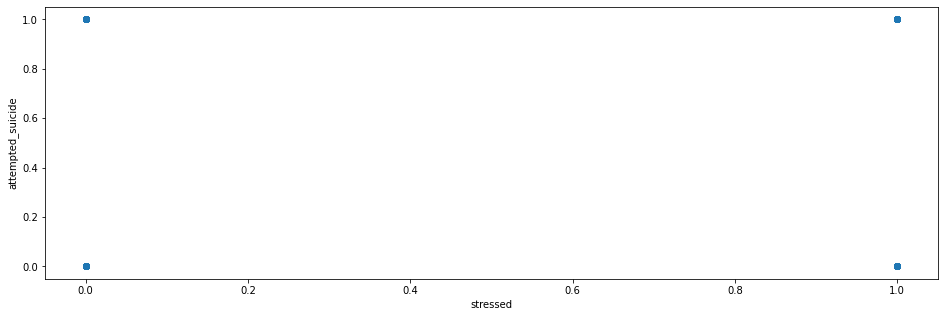

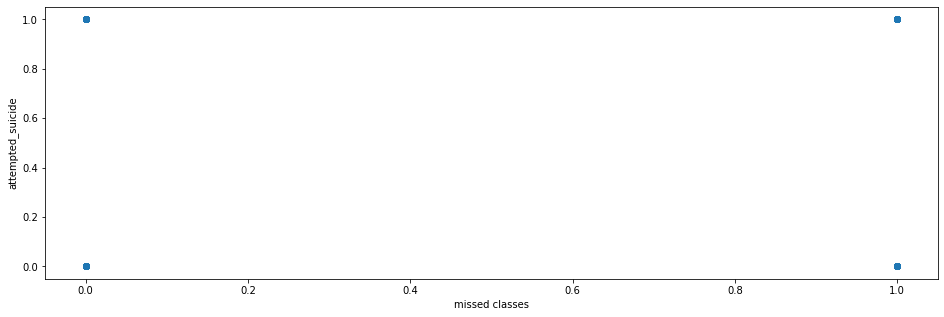

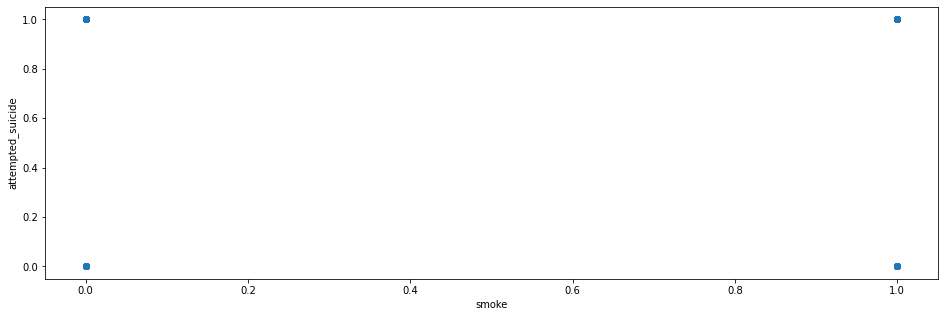

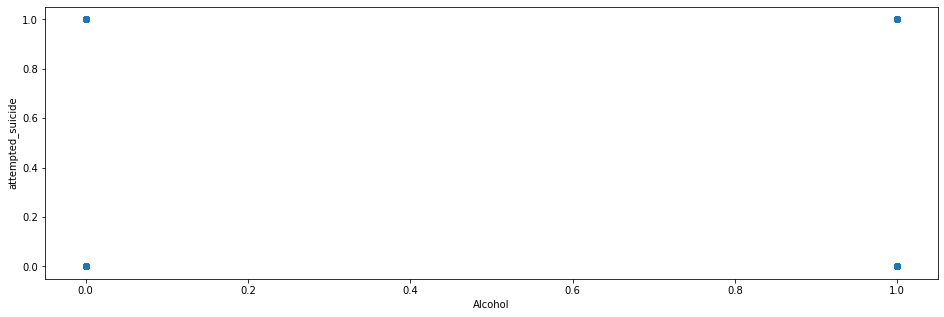

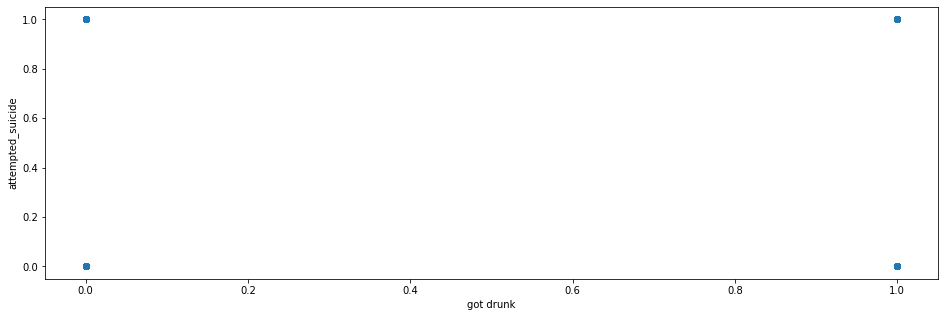

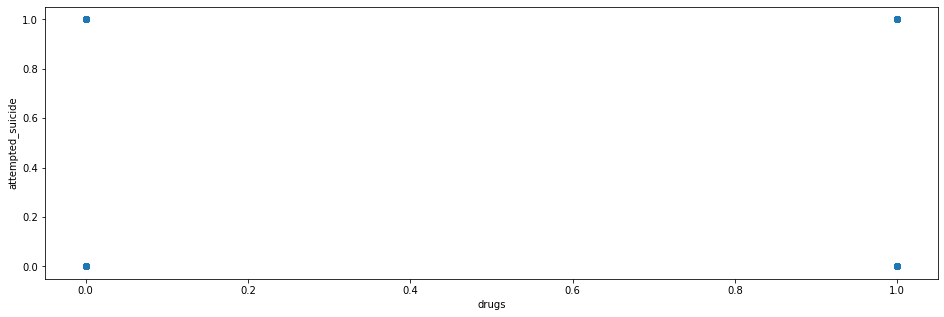

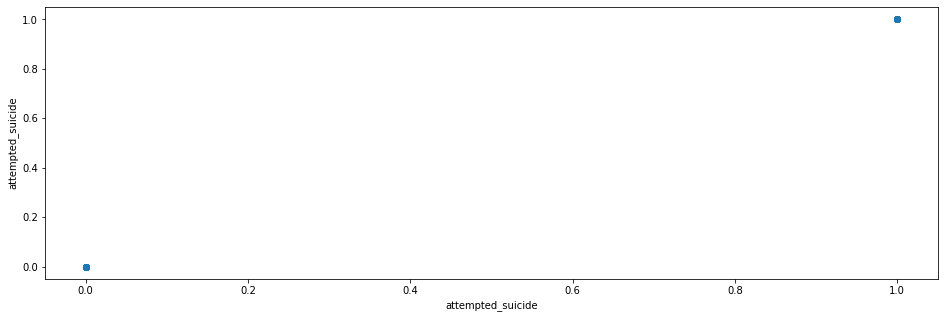

In [ ]:
for col in df_num.columns:
  fig, ax = plt.subplots(1,figsize=(16,5))
  plt.scatter(df[col], df['attempted_suicide'])
  plt.xlabel(col)
  plt.ylabel('attempted_suicide')

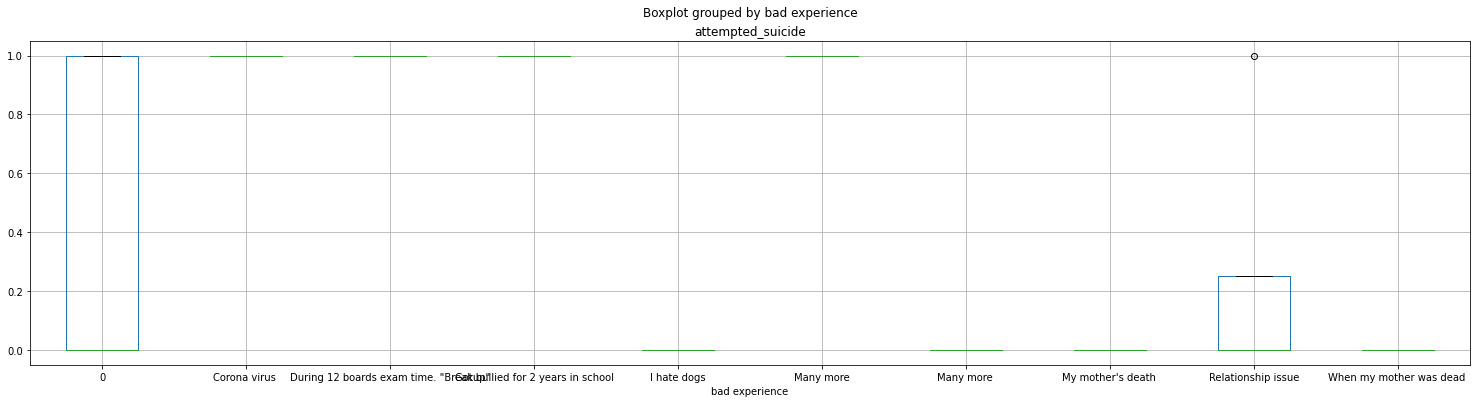

In [ ]:
for col in df_cat.columns:
  df.boxplot(column = 'attempted_suicide', by = col,figsize=(25,6))

In [ ]:
max(df['attempted_suicide'])

1

In [ ]:
med = df['attempted_suicide'].median()

In [ ]:
df['attempted_suicide'].replace(1,med,inplace=True)

In [ ]:
max(df['attempted_suicide'])

0

In [ ]:
med = df['attempted_suicide'].median()

In [ ]:
df['attempted_suicide'].replace(0,med,inplace=True)

<Axes: xlabel='attempted_suicide'>

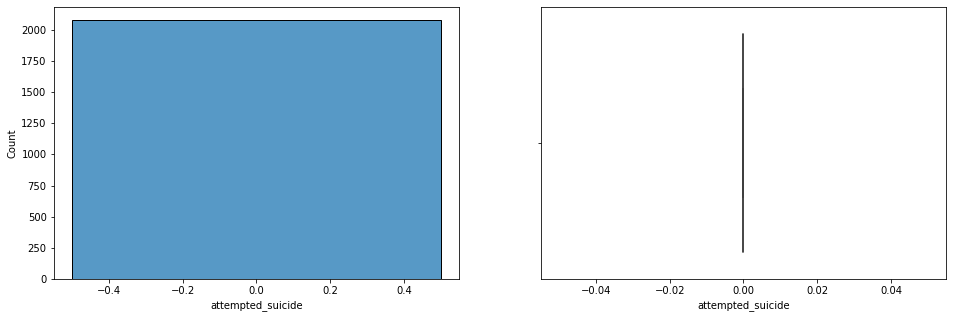

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.histplot(data=df, x=df['attempted_suicide'], ax=ax[0])
sns.boxplot(data=df, x=df['attempted_suicide'], ax=ax[1])

In [ ]:
max(df['Alcohol'])

1

In [ ]:
df['attempted_suicide'].replace(1,med,inplace=True)

Text(0, 0.5, 'attempted_suicide')

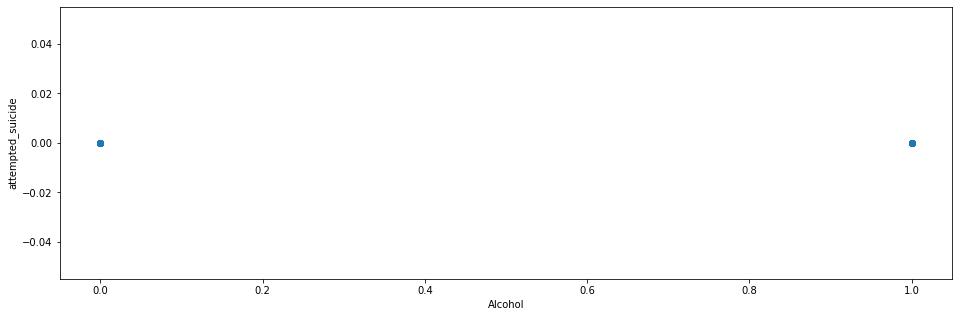

In [ ]:
fig, ax = plt.subplots(1,figsize=(16,5))
plt.scatter(df['Alcohol'], df['attempted_suicide'])
plt.xlabel('Alcohol')
plt.ylabel('attempted_suicide')

<Axes: xlabel='Alcohol'>

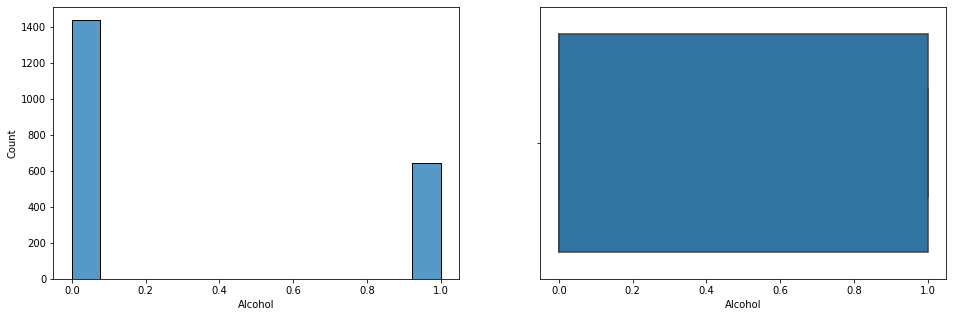

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.histplot(data=df, x=df['Alcohol'], ax=ax[0])
sns.boxplot(data=df, x=df['Alcohol'], ax=ax[1])

In [ ]:
max(df['injury'])

1

In [ ]:
med = df['injury'].median()
df['injury'].replace(1,med,inplace=True)

Text(0, 0.5, 'attempted_suicide')

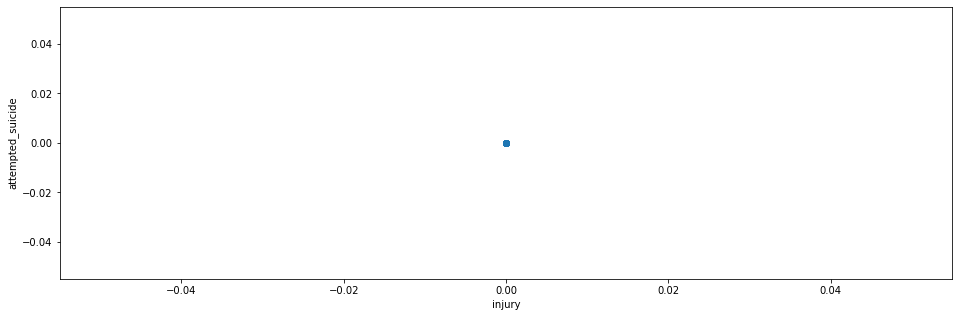

In [ ]:
fig, ax = plt.subplots(1,figsize=(16,5))
plt.scatter(df['injury'], df['attempted_suicide'])
plt.xlabel('injury')
plt.ylabel('attempted_suicide')

<Axes: xlabel='injury'>

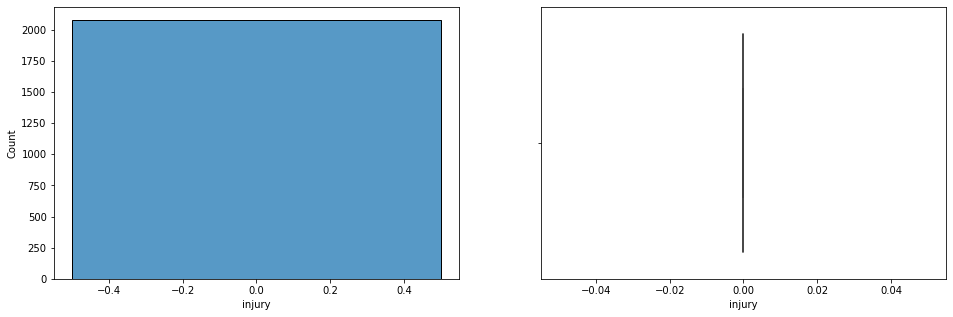

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.histplot(data=df, x=df['injury'], ax=ax[0])
sns.boxplot(data=df, x=df['injury'], ax=ax[1])

In [ ]:
cor_df_num = df_num.corr()
cor_df_num

,Age,Gender,Weight,friends/Relatives,understanding parents,injury,fights,bullied,toxic relationship,stressed,missed classes,smoke,Alcohol,got drunk,drugs,attempted_suicide
Age,1.000000,0.143421,0.216630,-0.363183,-0.169872,-0.071796,0.104144,0.266177,0.150041,0.112217,-0.274891,-0.110755,-0.007870,-0.092293,-0.303036,-0.007116
Gender,0.143421,1.000000,-0.285424,0.099533,0.112141,-0.254300,-0.259914,0.085588,0.137029,0.471169,0.375056,0.039271,0.309452,0.153409,-0.293553,0.294787
Weight,0.216630,-0.285424,1.000000,-0.174581,-0.065716,-0.209484,0.416723,0.195159,0.059432,0.126989,-0.345875,-0.133349,-0.436321,-0.343822,0.084242,-0.189069
friends/Relatives,-0.363183,0.099533,-0.174581,1.000000,0.191370,0.162504,-0.278680,-0.320421,0.056868,0.037963,0.231201,0.234300,0.173348,0.135056,-0.050864,-0.370805
understanding parents,-0.169872,0.112141,-0.065716,0.191370,1.000000,-0.419791,0.089823,0.238592,0.063766,-0.156528,0.036892,-0.164457,-0.233295,-0.443178,0.143559,-0.371434
injury,-0.071796,-0.254300,-0.209484,0.162504,-0.419791,1.000000,-0.199846,-0.335125,0.261722,-0.004220,0.064353,0.408402,0.322222,0.510434,0.097909,0.027828
fights,0.104144,-0.259914,0.416723,-0.278680,0.089823,-0.199846,1.000000,0.484508,-0.377475,-0.107046,-0.123943,-0.293847,-0.430630,-0.174169,0.211102,-0.065792
bullied,0.266177,0.085588,0.195159,-0.320421,0.238592,-0.335125,0.484508,1.000000,-0.196457,-0.064058,-0.205413,-0.263361,-0.165824,-0.159292,-0.181061,-0.031335
toxic relationship,0.150041,0.137029,0.059432,0.056868,0.063766,0.261722,-0.377475,-0.196457,1.000000,-0.107847,0.107721,0.318142,0.249597,-0.163916,-0.181430,-0.046970
stressed,0.112217,0.471169,0.126989,0.037963,-0.156528,-0.004220,-0.107046,-0.064058,-0.107847,1.000000,0.147991,-0.107203,0.157528,0.432826,-0.249470,0.349104


<Axes: >

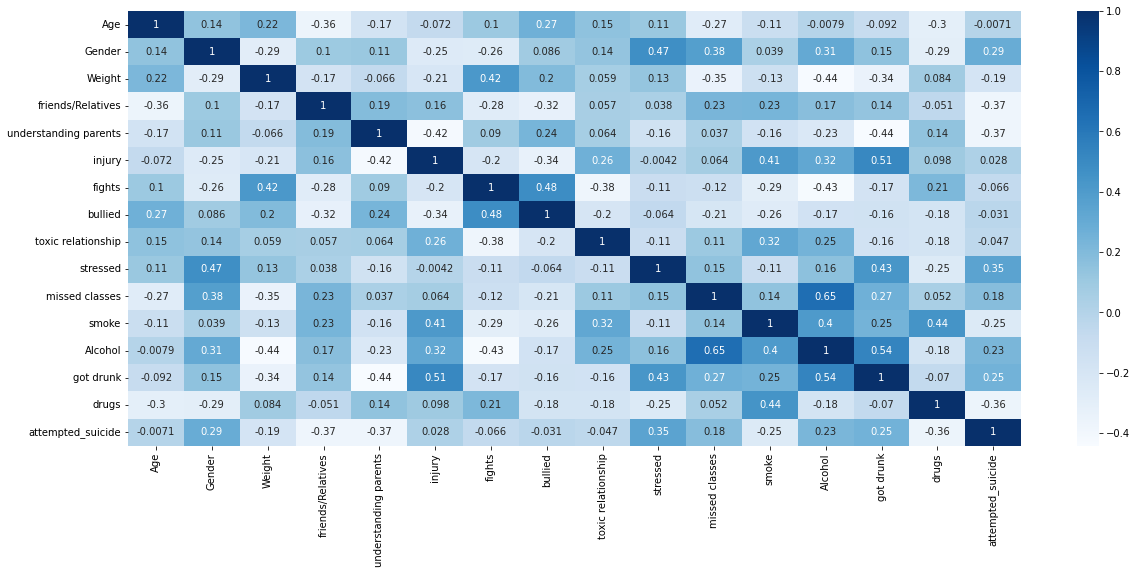

In [ ]:
plt.figure(figsize = (20,8))
sns.heatmap(cor_df_num,annot=True,cmap='Blues')

In [ ]:
df.groupby(['Weight','bullied'])[['attempted_suicide']].mean().sort_values('attempted_suicide', ascending = False)

attempted_suicide
Weight bullied                   
1      0                      0.0
       1                      0.0
2      0                      0.0
       1                      0.0
3      0                      0.0
       1                      0.0

In [ ]:
df.groupby(['Age','toxic relationship'])[['attempted_suicide']].mean().sort_values('attempted_suicide', ascending = True)

attempted_suicide
Age toxic relationship                   
9   1                                 0.0
34  1                                 0.0
35  0                                 0.0
    1                                 0.0
36  0                                 0.0
    1                                 0.0
37  1                                 0.0
38  1                                 0.0
39  1                                 0.0
40  1                                 0.0
42  1                                 0.0
43  0                                 0.0
    1                                 0.0
44  1                                 0.0
45  1                                 0.0
46  0                                 0.0
    1                                 0.0
47  1                                 0.0
48  1                                 0.0
49  1                                 0.0
51  0                                 0.0
    1                                 0.0
52  1                                 0.0
53  1                                 0.0
34  0                                 0.0
32  1                                 0.0
31  1                                 0.0
30  1                                 0.0
10  0                                 0.0
13  1                                 0.0
16  0                                 0.0
17  1                                 0.0
18  1                                 0.0
19  0                                 0.0
    1                                 0.0
20  0                                 0.0
    1                                 0.0
21  0                                 0.0
    1                                 0.0
55  1                                 0.0
22  0                                 0.0
23  0                                 0.0
    1                                 0.0
24  0                                 0.0
    1                                 0.0
25  1                                 0.0
26  1                                 0.0
27  0                                 0.0
    1                                 0.0
28  0                                 0.0
    1                                 0.0
30  0                                 0.0
22  1                                 0.0
99  1                                 0.0

In [ ]:
df.groupby(['Gender','Weight'])[['attempted_suicide']].mean().sort_values('attempted_suicide', ascending = True)

attempted_suicide
Gender Weight                   
8      1                     0.0
       2                     0.0
       3                     0.0
9      1                     0.0
       2                     0.0
       3                     0.0

In [ ]:
df.groupby(['Gender','friends/Relatives'])[['attempted_suicide']].mean().sort_values('attempted_suicide', ascending = True)

attempted_suicide
Gender friends/Relatives                   
8      0                                0.0
       1                                0.0
9      0                                0.0
       1                                0.0

In [ ]:
df.groupby(['Gender','drugs'])[['attempted_suicide']].mean().sort_values('attempted_suicide', ascending = True)

attempted_suicide
Gender drugs                   
8      0                    0.0
       1                    0.0
9      0                    0.0
       1                    0.0

In [ ]:
df.groupby(['fights','understanding parents'])[['attempted_suicide']].mean().sort_values('attempted_suicide', ascending = True)

attempted_suicide
fights understanding parents                   
0      0                                    0.0
       1                                    0.0
1      0                                    0.0
       1                                    0.0

**FPGROWTH**

In [ ]:
# Read dataset from binary.csv file
dataset = pd.read_csv('dataa.csv', header=None)
transactions = []

In [ ]:
# Convert pandas dataframe to list of transactions
for i in range(len(dataset)):
    transactions.append([str(dataset.values[i,j]) for j in range(len(dataset.columns))])


In [ ]:
# Set minimum support count
min_support_count = 300

# Create dictionary to store support count of each item
support_count = defaultdict(int)

In [ ]:
# Count the support of each item
for transaction in transactions:
    for item in transaction:
        support_count[item] += 1

In [ ]:
# Remove items that don't meet minimum support count
frequent_items = {}
for item, support in support_count.items():
    if support >= min_support_count:
        frequent_items[item] = support

In [ ]:
# Sort frequent items by support count
frequent_items = dict(sorted(frequent_items.items(), key=lambda item: item[1], reverse=True))

In [ ]:
# Create sorted frequent itemsets from sorted frequent items
sorted_frequent_itemsets = []
for item in frequent_items:
    sorted_frequent_itemsets.append([item])

In [ ]:
# Build FP-tree
root = {}
for transaction in transactions:
    transaction = [item for item in transaction if item in frequent_items]
    transaction.sort(key=lambda item: frequent_items[item], reverse=True)
    current_node = root
    for item in transaction:
        if item not in current_node:
            current_node[item] = {'count': 1, 'children': {}}
        else:
            current_node[item]['count'] += 1
        current_node = current_node[item]['children']

# Generate frequent itemsets
frequent_itemsets = []
stack = [{'node': root, 'path': []}]
while len(stack) > 0:
    current_level_items = defaultdict(int)
    while len(stack) > 0:
        current = stack.pop()
        node = current['node']
        path = current['path']
        for item, child_node in node.items():
            current_path = path.copy()
            current_path.append(item)
            current_level_items[tuple(current_path)] += child_node['count']
            stack.append({'node': child_node['children'], 'path': current_path})
    for itemset, count in current_level_items.items():
        if count >= min_support_count:
            frequent_itemsets.append({'items': list(itemset), 'support': count})

In [ ]:
# Print frequent itemsets
print("Frequent itemsets (minimum support count = {}):".format(min_support_count))
for itemset in frequent_itemsets:
    print("{} - support count: {}".format(itemset['items'], itemset['support']))


Frequent itemsets (minimum support count = 300):
['0'] - support count: 2079
['0', '0'] - support count: 2079
['0', '0', '0'] - support count: 2078
['0', '0', '0', '0'] - support count: 2075
['0', '0', '0', '0', '0'] - support count: 2069
['0', '0', '0', '0', '0', '0'] - support count: 2067
['0', '0', '0', '0', '0', '0', '0'] - support count: 1870
['0', '0', '0', '0', '0', '0', '0', '0'] - support count: 1648
['0', '0', '0', '0', '0', '0', '0', '0', '0'] - support count: 1192
['0', '0', '0', '0', '0', '0', '0', '0', '1'] - support count: 456
['0', '0', '0', '0', '0', '0', '0', '0', '1', '1'] - support count: 456
['0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1'] - support count: 456
['0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1'] - support count: 456
['0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1'] - support count: 456
['0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1'] - support count: 456
['0', '0', '0', '0', '0', '0', '0', '0', '

**Apriori**

In [ ]:
# Load dataset
df = pd.read_csv('dataa.csv')

# Convert columns to boolean
df = df.astype(bool)

# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Print frequent itemsets
print(frequent_itemsets)

# Print association rules
print(rules)

     support                                         itemsets
0   1.000000                                            (Age)
1   0.614719                                         (Gender)
2   0.800385                                         (Weight)
3   0.551708                              (friends/Relatives)
4   0.555075                          (understanding parents)
..       ...                                              ...
64  0.353535  (Age, understanding parents, friends/Relatives)
65  0.317460         (Age, friends/Relatives, missed classes)
66  0.303992             (Age, fights, understanding parents)
67  0.325156            (Age, bullied, understanding parents)
68  0.364117                           (Age, fights, bullied)

[69 rows x 2 columns]
           antecedents          consequents  antecedent support  \
0                (Age)             (Gender)            1.000000   
1             (Gender)                (Age)            0.614719   
2                (Age)          